# Proceso de utilizar librerias para ciencia de datos para cargar, realizar descriptivas y también realizar

In [63]:
# @title Instalar librerias relacionadas al toolbox

%pip install sweetviz
%pip install flaml
%pip install pycaret
%pip install autoviz
%pip install shap
%pip install rbt
%pip install h2o
%pip install numba #==0.56.4
%pip install lazypredict
%pip install kagglehub
%pip install pandas-profiling

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.3.2 which is incompatible.


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.1.1 which is incompatible.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [1]:
# @title Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import kagglehub
# import pandas_profiling
import lazypredict
import flaml
import pycaret
# import autoviz
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import shap
import rbt


# Load Data

In [2]:
# Cargo la información de la base de datos por medio de colab
# FILEID = "139-D2n00MROat1wk35wjv2Gci6K6WHK8"
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Iris.csv && rm -rf /tmp/cookies.txt

In [3]:
# # Cargo la información de la base de datos por medio de kaggle
# # Download latest version
# path = kagglehub.dataset_download("himanshunakrani/iris-dataset")

# print("Path to dataset files:", path)

In [2]:
#Importing the pandas
import pandas as pd
path = 'iris.csv'
#Reading the dataset
#Loading the data
data = pd.read_csv(path)

# 1 sweetviz

In [5]:
#Importing SweetViz
import sweetviz

#Generating report
report = sweetviz.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



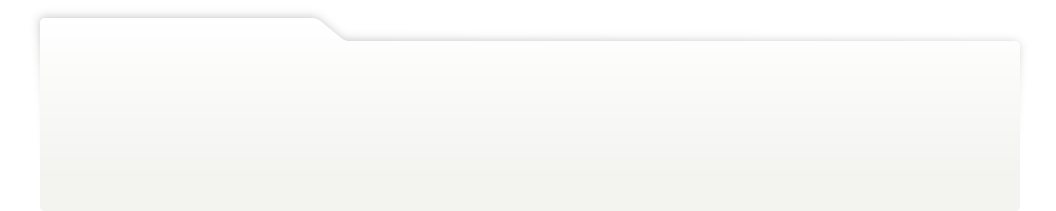
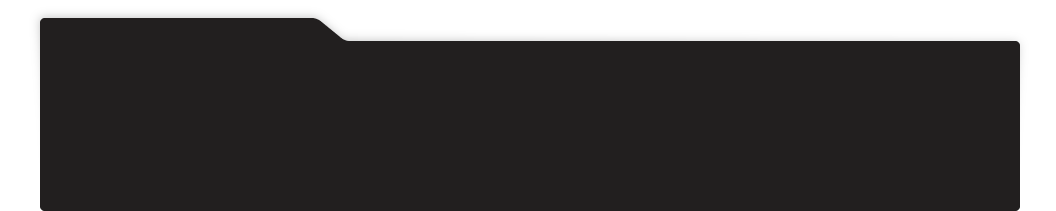
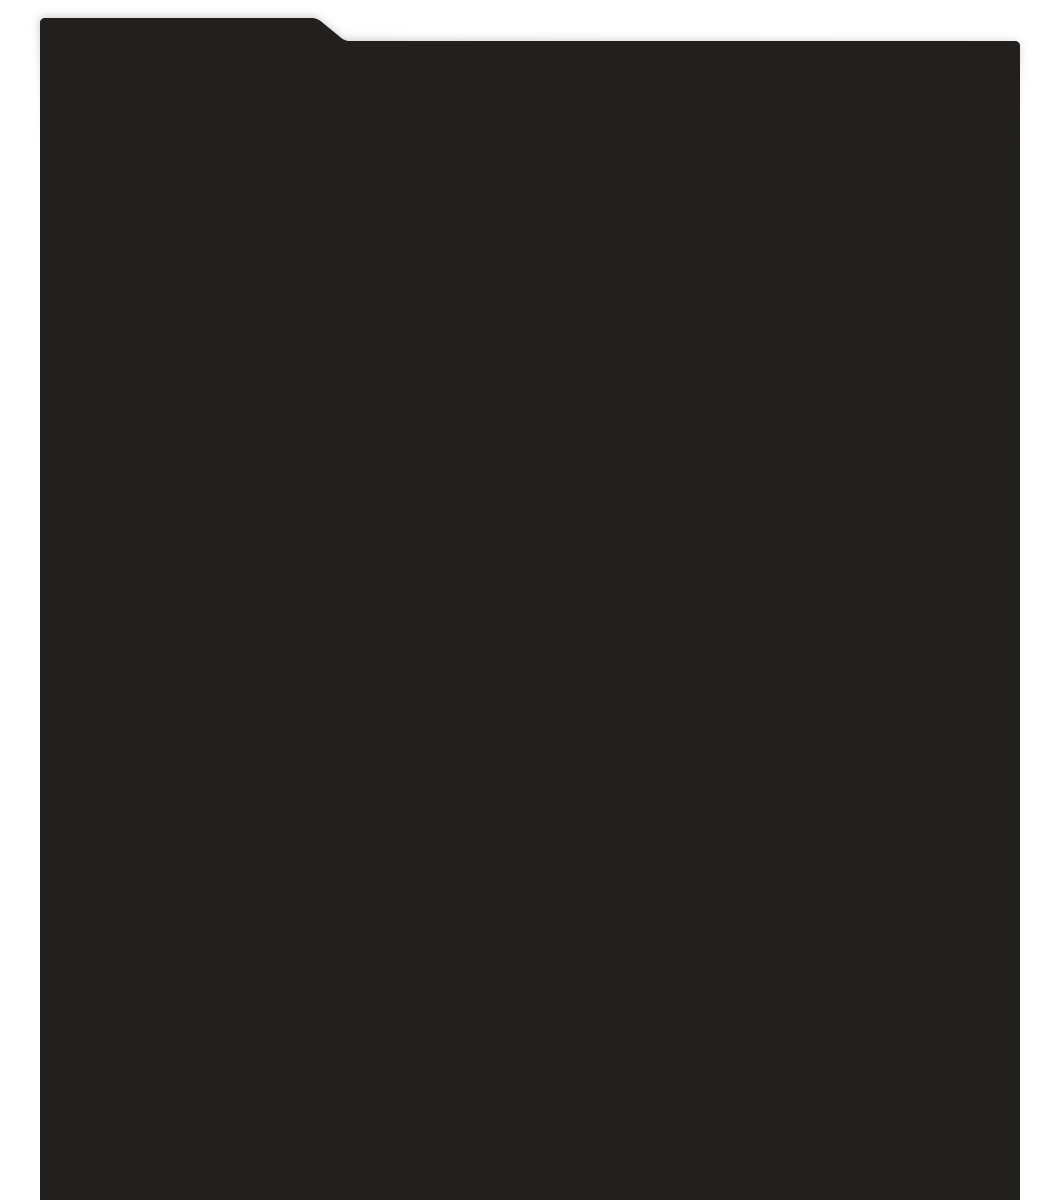
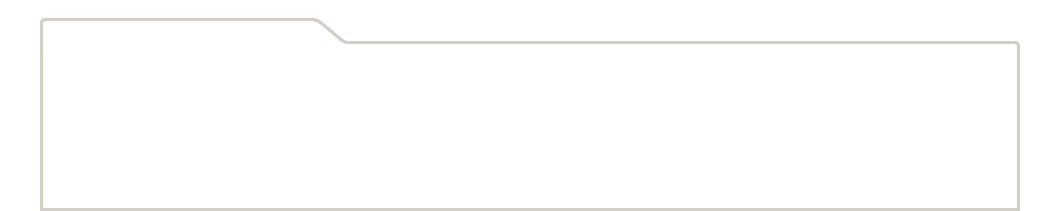
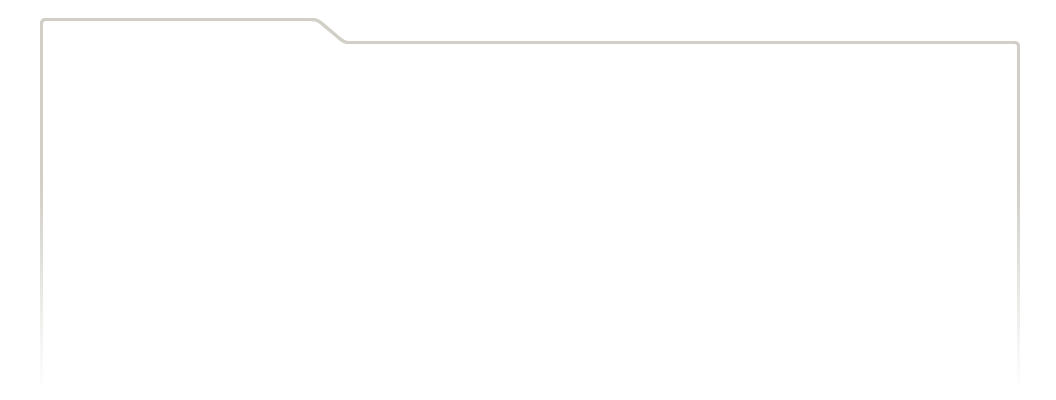
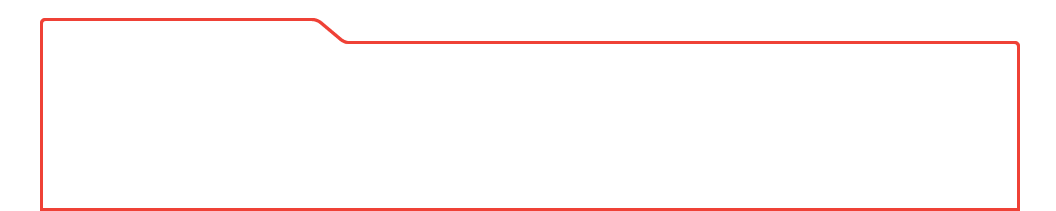
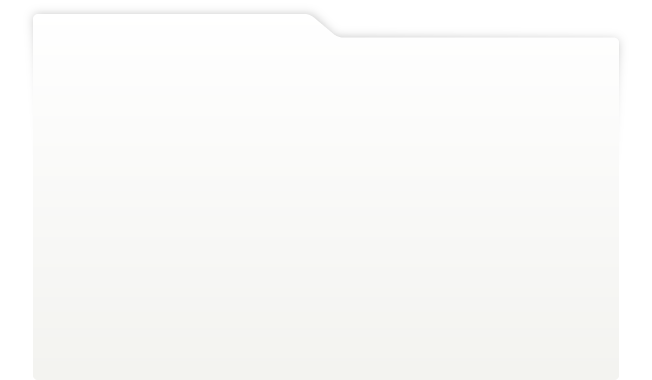
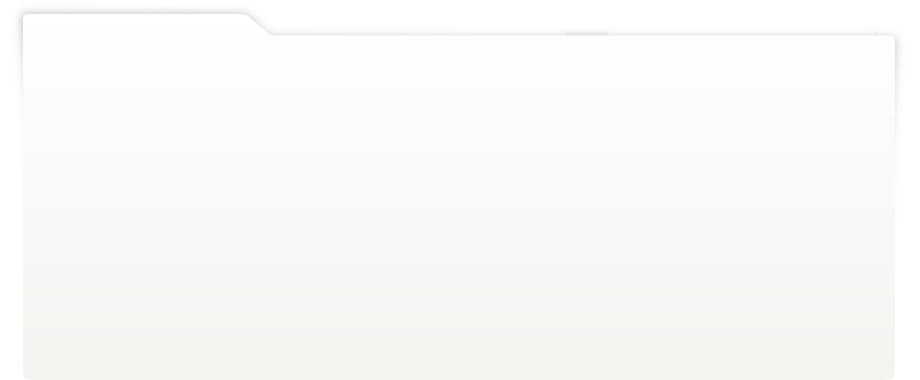
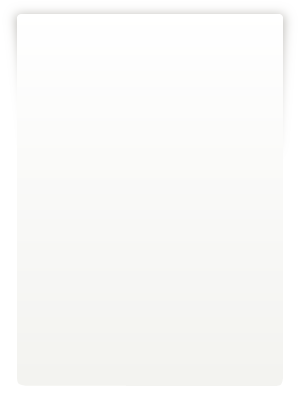
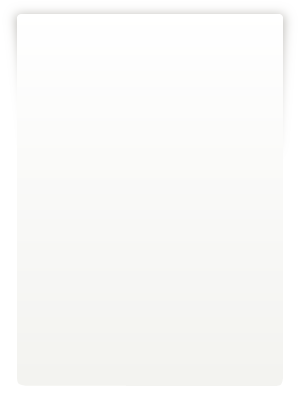
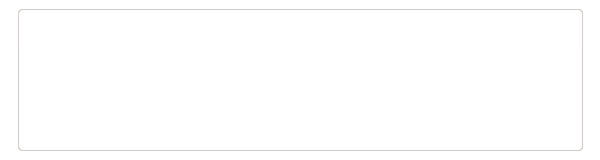
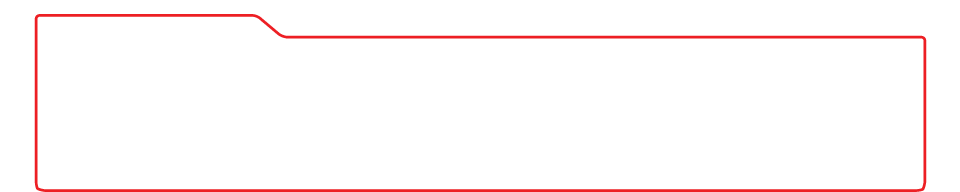
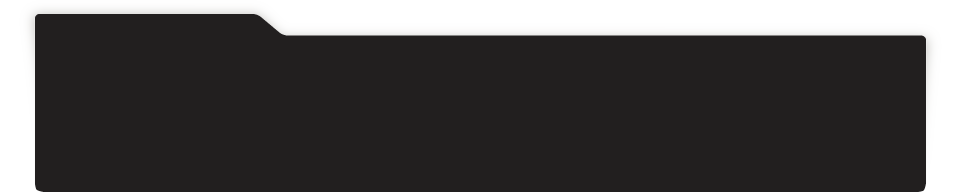
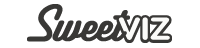
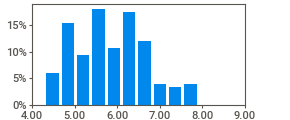
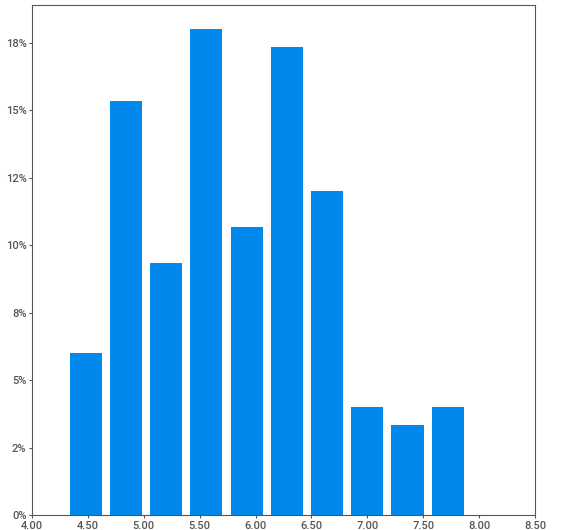
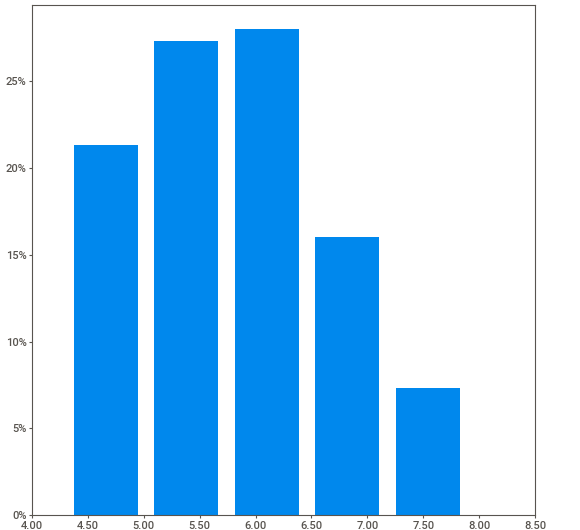
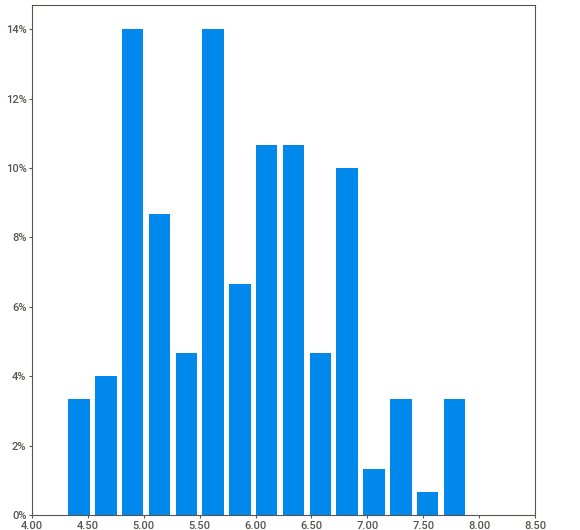
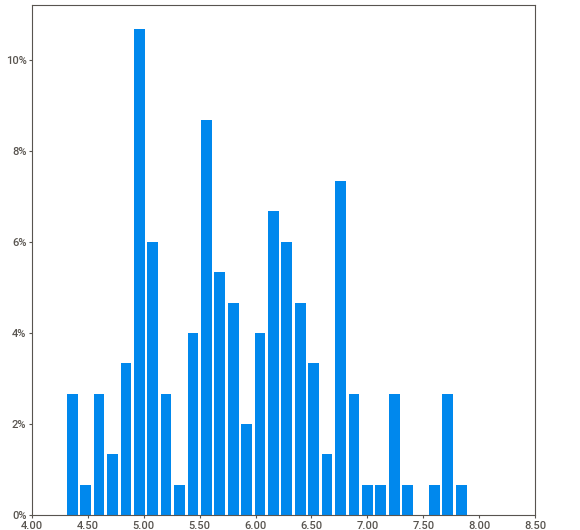
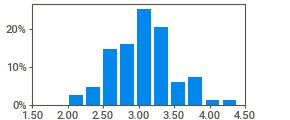
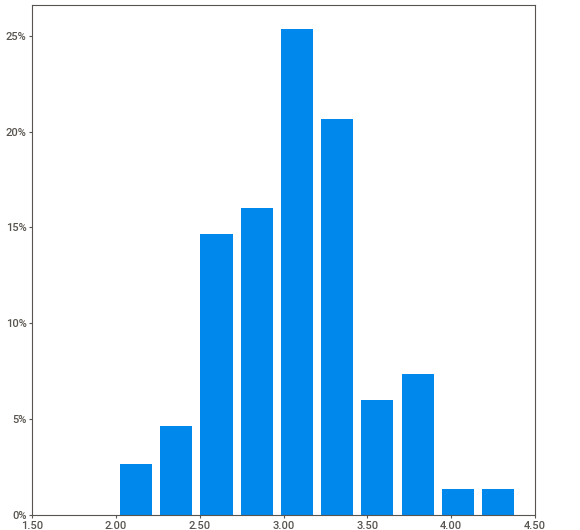
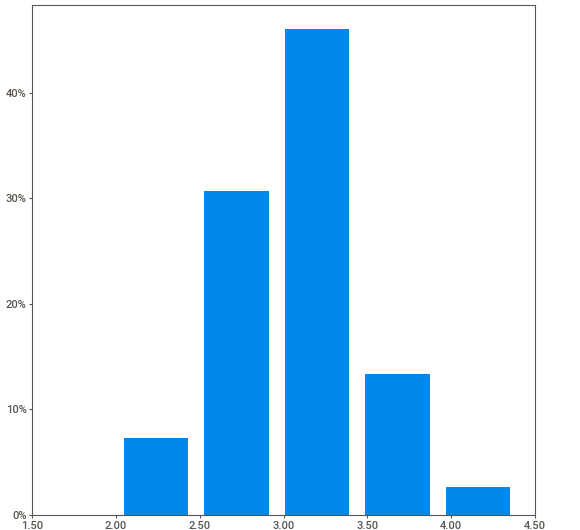
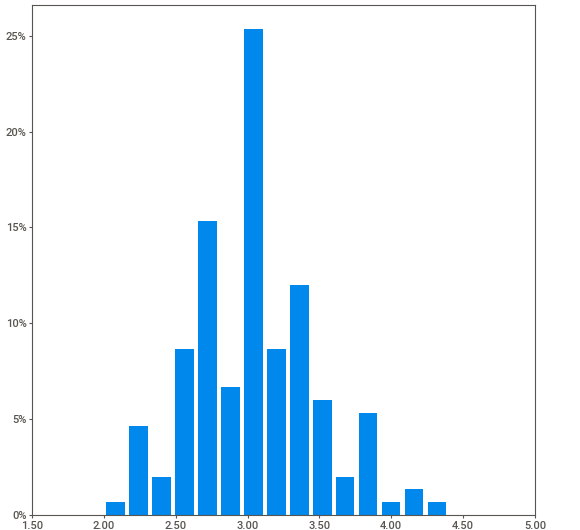
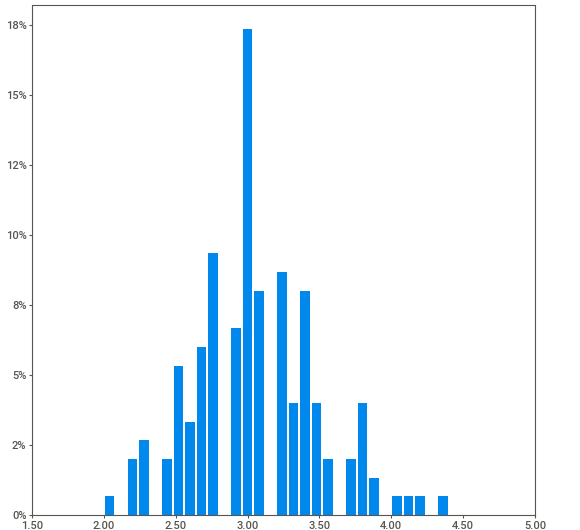
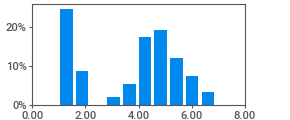
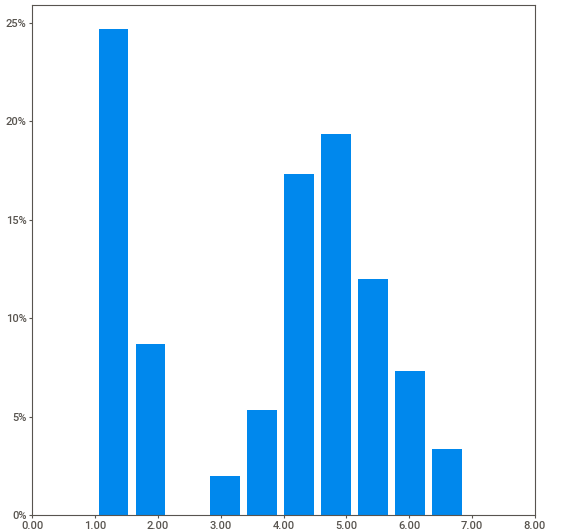
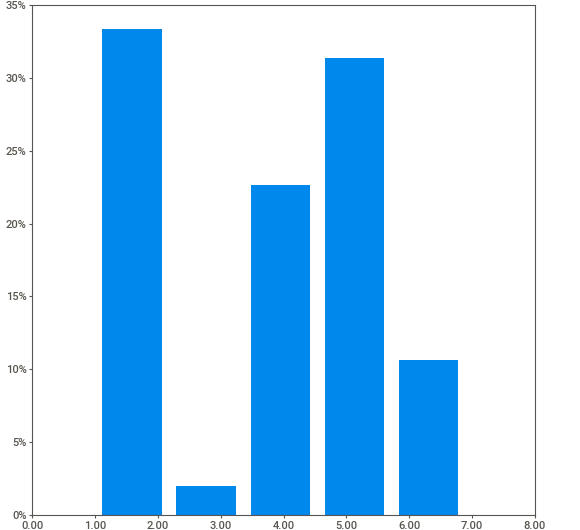
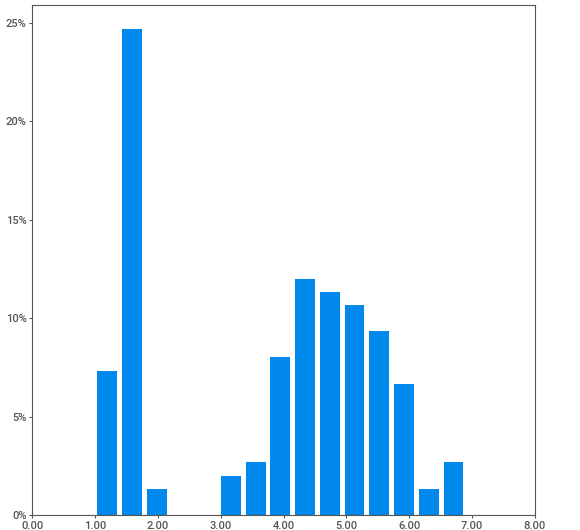
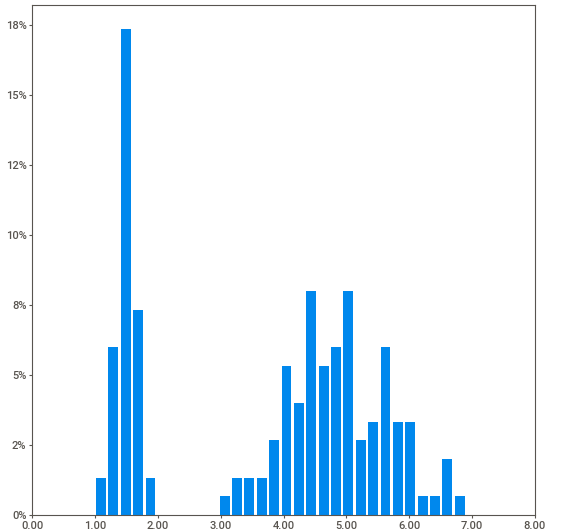
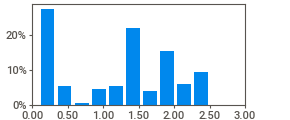
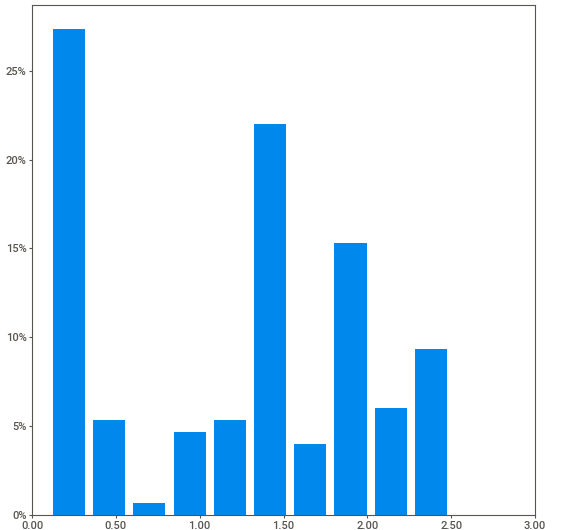
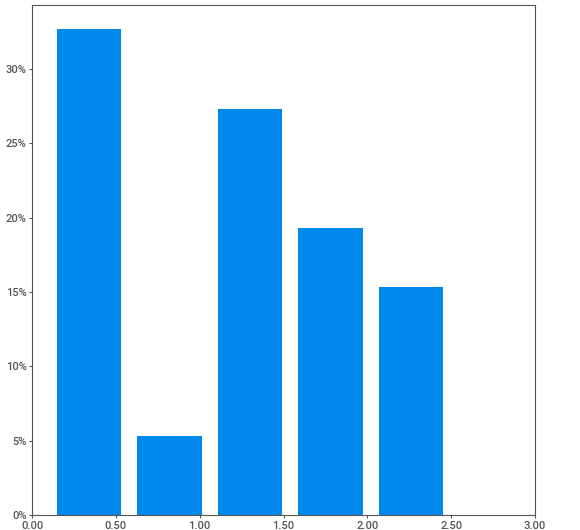
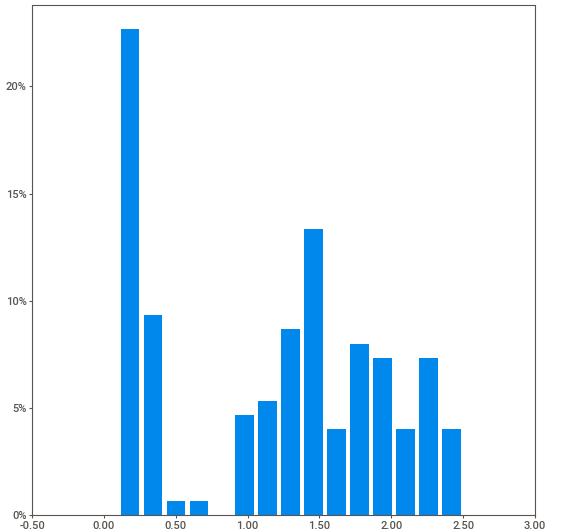
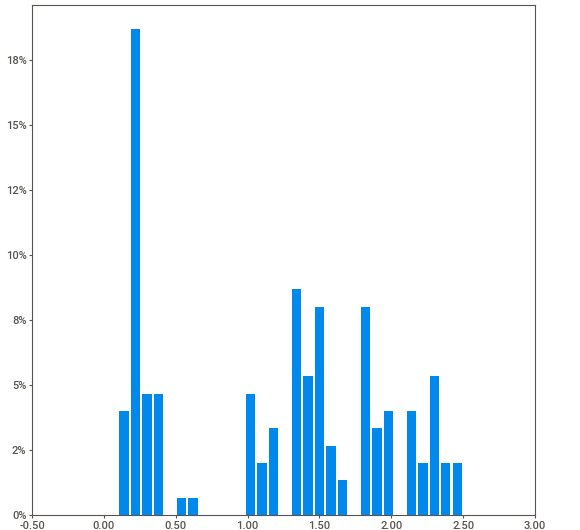
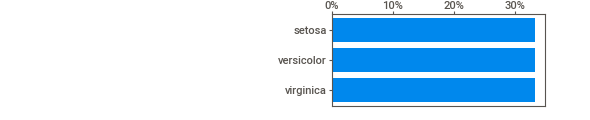
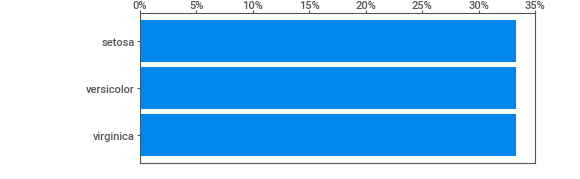
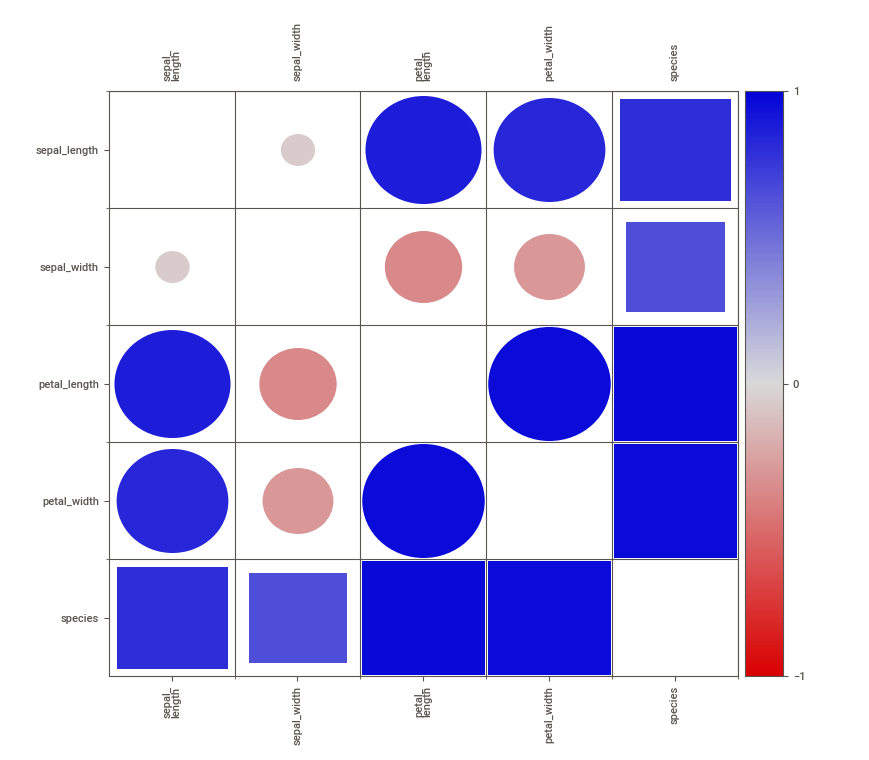
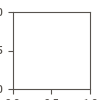

In [6]:
#To save the HTML format of the report, use this:
report.show_html()

#To view the report inside a Jupyter Notebook, use this:
report.show_notebook()

# Clasificación

## 2 LazyClassifier

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Separating the target variable and rest of the data.
y = data['species']
# data.drop('Species', inplace=True, axis=1)
X = data.drop('species',axis=1)

# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state =1)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

#Training the models
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# Printing the output
models


100%|██████████| 29/29 [00:04<00:00,  6.98it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Info] Start training from score -1.176574
[LightGBM] [Info] Start training from score -1.003302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.03
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
AdaBoostClassifier,0.97,0.97,None,0.97,0.38
KNeighborsClassifier,0.97,0.97,None,0.97,0.02
SVC,0.97,0.97,None,0.97,0.07
SGDClassifier,0.97,0.97,None,0.97,0.05
RandomForestClassifier,0.97,0.97,None,0.97,0.56
NuSVC,0.97,0.97,None,0.97,0.02
BaggingClassifier,0.97,0.97,None,0.97,0.06


In [8]:
best_model_name = models.index[0]  # Nombre del mejor modelo
best_model_metrics = models.iloc[0]  # Métricas del mejor modelo


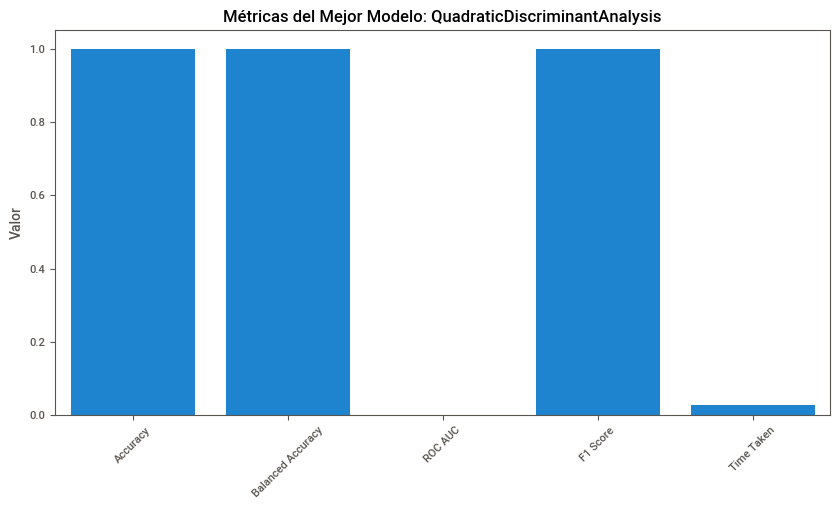

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las métricas a formato de diccionario
metrics_dict = best_model_metrics.to_dict()

# Graficar
plt.figure(figsize=(10, 5))
sns.barplot(x=list(metrics_dict.keys()), y=list(metrics_dict.values()))
plt.xticks(rotation=45)
plt.title(f'Métricas del Mejor Modelo: {best_model_name}')
plt.ylabel("Valor")
plt.show()


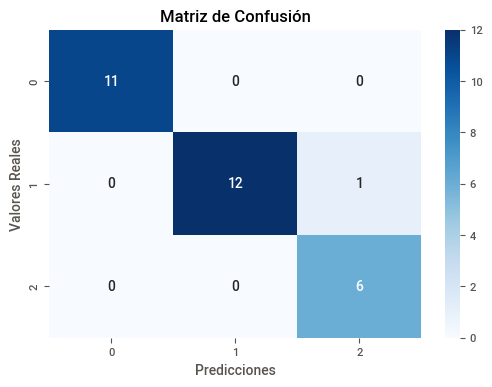

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Importar el modelo seleccionado
from sklearn.ensemble import RandomForestClassifier  # Cambia esto según el mejor modelo

best_model = RandomForestClassifier()  # Instancia del modelo
best_model.fit(X_train, y_train)  # Entrenamiento

# Predicciones en test
y_pred = best_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))


## 3 flaml


In [11]:
from flaml import AutoML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Separating the target variable and rest of the data.
# y = data['Species']
# data.drop('Species',inplace=True,axis=1)
# X = data

#Using Label Encoder to convert categorical variables to numerical variables
label_endcoder = LabelEncoder()
y = label_endcoder.fit_transform(y)

# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =1)

automl = AutoML()

#Training the models
automl.fit(X_train, y_train, task="classification")

[flaml.automl.logger: 03-09 06:07:05] {1728} INFO - task = classification
[flaml.automl.logger: 03-09 06:07:05] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 03-09 06:07:05] {1838} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 03-09 06:07:05] {1861} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.


INFO:flaml.default.suggest:metafeature distance: 0.1680375415048191
INFO:flaml.default.suggest:metafeature distance: 0.1680375415048191
INFO:flaml.default.suggest:metafeature distance: 0.16804601690452298
INFO:flaml.default.suggest:metafeature distance: 0.16804601690452298
INFO:flaml.default.suggest:metafeature distance: 0.16804601690452298
INFO:flaml.default.suggest:metafeature distance: 0.1680375415048191


[flaml.automl.logger: 03-09 06:07:05] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 03-09 06:07:05] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 03-09 06:07:13] {2393} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[flaml.automl.logger: 03-09 06:07:13] {2442} INFO -  at 8.7s,	estimator rf's best error=0.1293,	best estimator rf's best error=0.1293
[flaml.automl.logger: 03-09 06:07:13] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-09 06:07:14] {2442} INFO -  at 8.9s,	estimator lgbm's best error=1.0979,	best estimator rf's best error=0.1293
[flaml.automl.logger: 03-09 06:07:14] {2258} INFO - iteration 2, current learner xgboost
[flaml.automl.logger: 03-09 06:09:34] {2442} INFO -  at 149.4s,	estimator xgboost's best error=0.1925,	best estimator rf's best error=0.1293
[flaml.automl.logger: 03-09 06:09:34] {2

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 03-09 06:10:16] {2442} INFO -  at 191.3s,	estimator sgd's best error=0.8127,	best estimator extra_tree's best error=0.1258
[flaml.automl.logger: 03-09 06:10:16] {2258} INFO - iteration 6, current learner lrl1


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 03-09 06:10:16] {2442} INFO -  at 191.5s,	estimator lrl1's best error=0.1755,	best estimator extra_tree's best error=0.1258
[flaml.automl.logger: 03-09 06:10:22] {2685} INFO - retrain extra_tree for 5.9s
[flaml.automl.logger: 03-09 06:10:22] {2688} INFO - retrained model: ExtraTreesClassifier(criterion='entropy', max_features=1.0,
                     max_leaf_nodes=18344, n_estimators=2047, n_jobs=-1,
                     random_state=12032022)
[flaml.automl.logger: 03-09 06:10:22] {1985} INFO - fit succeeded
[flaml.automl.logger: 03-09 06:10:22] {1986} INFO - Time taken to find the best model: 172.6500222682953


In [12]:
automl.best_estimator

'extra_tree'

In [13]:
automl.best_config

{'n_estimators': 2047,
 'max_features': 1.0,
 'max_leaves': 18344,
 'criterion': 'entropy'}

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



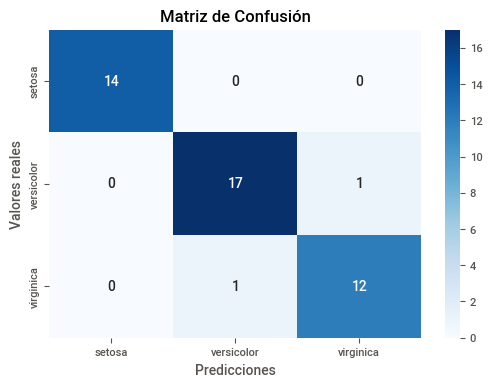

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred = automl.predict(X_test)

# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_endcoder.classes_, yticklabels=label_endcoder.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")
plt.show()


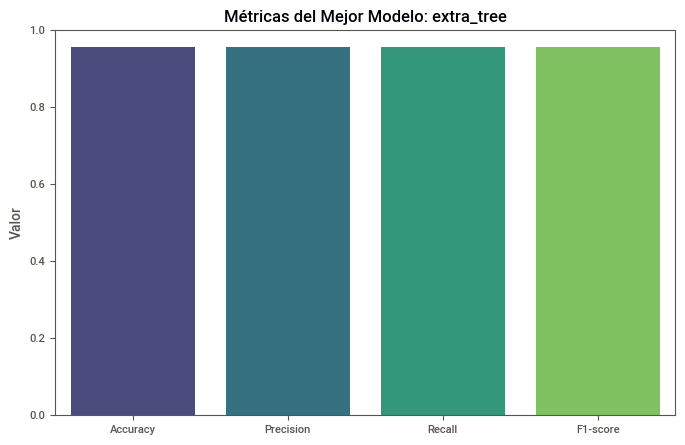

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Crear diccionario con métricas
metrics_dict = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics_dict.keys()), y=list(metrics_dict.values()), palette="viridis")
plt.ylim(0, 1)  # Ajustar escala
plt.title(f'Métricas del Mejor Modelo: {automl.best_estimator}')
plt.ylabel("Valor")
plt.show()


## h2o

In [48]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

# Iniciar H2O
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,11 mins 06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_o14emi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.162 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [56]:
y = data['species']
# data.drop('Species', inplace=True, axis=1)
X = data.drop('species',axis=1)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a formato H2O
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Definir la variable objetivo
target = "species"
train[target] = train[target].asfactor()  # Convertir a categórico para clasificación
test[target] = test[target].asfactor()
features = train.columns.remove(target)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [57]:
# Configurar y entrenar AutoML con H2O
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=features, y=target, training_frame=train)


AutoML progress: |█████
06:40:12.720: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.

██████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20250309_64003


GLM Model: summary
    family       link         regularization               lambda_search                                                                    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  -------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 2.911E-4 )  nlambda = 30, lambda.max = 43.302, lambda.min = 2.911E-4, lambda.1se = 0.001216  15                            12                             100                     AutoML_2_20250309_64003_training_py_11_sid_b3a5

ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.015862965043942728
RMSE: 0.1259482633621549
LogLoss: 0.055840338260858845
Null degrees of freedom: 119
Residual degrees of freedom: 105
Null deviance: 263.61694407071036
Residual deviance: 13.401681182606122
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
40        0             0            0          0 / 40
0         40            1            0.0243902  1 / 41
0         1             38           0.025641   1 / 39
40        41            39           0.0166667  2 / 120

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.983333
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.027434853488454335
RMSE: 0.16563469892644578
LogLoss: 0.08608622432364961
Null degrees of freedom: 119
Residual degrees of freedom: 105
Null deviance: 268.2758084968263
Residual deviance: 20.660693837675908
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
40        0             0            0          0 / 40
0         37            4            0.097561   4 / 41
0         1             38           0.025641   1 / 39
40        38            42           0.0416667  5 / 120

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.958333
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.958333   0.0294628  1             0.958333      0.958333      0.958333      0.916667
aic                      nan        0          nan           nan           nan           nan           nan
auc                      nan        0          nan           nan           nan           nan           nan
err                      0.0416667  0.0294628  0             0.0416667     0.0416667     0.0416667     0.0833333
err_count                1          0.707107   0             1             1             1             2
loglikelihood            0          0          0  

In [58]:
print("Mejor modelo encontrado:", aml.leader)

Mejor modelo encontrado: Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20250309_64003


GLM Model: summary
    family       link         regularization               lambda_search                                                                    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  -------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 2.911E-4 )  nlambda = 30, lambda.max = 43.302, lambda.min = 2.911E-4, lambda.1se = 0.001216  15                            12                             100                     AutoML_2_20250309_64003_training_py_11_sid_b3a5

ModelMetricsMultinomialGLM: glm
** Reported on train

In [61]:
aml.leader.params


{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_1_AutoML_2_20250309_64003',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_1_AutoML_2_20250309_64003'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20250309_64003_training_py_11_sid_b3a5',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20250309_64003_training_py_11_sid_b3a5'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20250309_64003_training_py_11_sid_b3a5',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20250309_64003_training_py_11_sid_b3a5'}},
 'validation_frame': {'default': None, 'actual': None, 'input': None},
 'nfolds': {'default': 0, 'actual': 5, 'input': 5},
 'checkpoint':

In [62]:
aml.leader.summary()

,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,multinomial,multinomial,Ridge ( lambda = 2.911E-4 ),"nlambda = 30, lambda.max = 43.302, lambda.min = 2.911E-4, lambda.1se = 0.001216",15,12,100,AutoML_2_20250309_64003_training_py_11_sid_b3a5


In [66]:
# Evaluar el mejor modelo con los datos de prueba
perf = aml.leader.model_performance(test)

# Mostrar métricas generales
perf


ModelMetricsMultinomialGLM: glm
** Reported on test data. **

MSE: 0.00826812876932283
RMSE: 0.0909292514503602
LogLoss: 0.037651131548618204
Null degrees of freedom: 29
Residual degrees of freedom: 15
Null deviance: 66.0292620691143
Residual deviance: 2.259067892917092
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error    Rate
--------  ------------  -----------  -------  ------
10        0             0            0        0 / 10
0         9             0            0        0 / 9
0         0             11           0        0 / 11
10        9             11           0        0 / 30

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

In [69]:
# Matriz de confusión
print(perf.confusion_matrix())

# AUC-ROC (para clasificación binaria)
print("AUC-ROC:", perf.auc())

# Log-loss
print("Log-Loss:", perf.logloss())

# Accuracy
print("Accuracy:", perf.aic())

# F1-Score
print("F1 Score:", perf.r2())



Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error    Rate
--------  ------------  -----------  -------  ------
10        0             0            0        0 / 10
0         9             0            0        0 / 9
0         0             11           0        0 / 11
10        9             11           0        0 / 30
AUC-ROC: NaN
Log-Loss: 0.037651131548618204
Accuracy: NaN
F1 Score: 0.9881696090741009


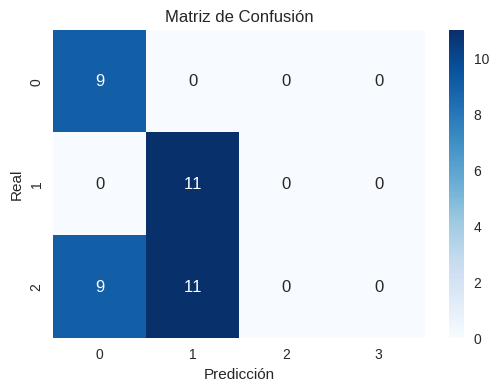

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Obtener la matriz de confusión como DataFrame
cm_df = perf.confusion_matrix().as_data_frame()

# Convertir los valores a numéricos, manejando strings y floats
def convertir_a_entero(valor):
    if isinstance(valor, str):
        return int(valor.split(" / ")[0])  # Extraer solo el primer número
    return int(valor)  # Si ya es numérico, convertirlo directamente

# Aplicar la conversión a la matriz
cm_values = cm_df.iloc[1:, 1:].applymap(convertir_a_entero)

# Convertir a array de numpy
cm = cm_values.values

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


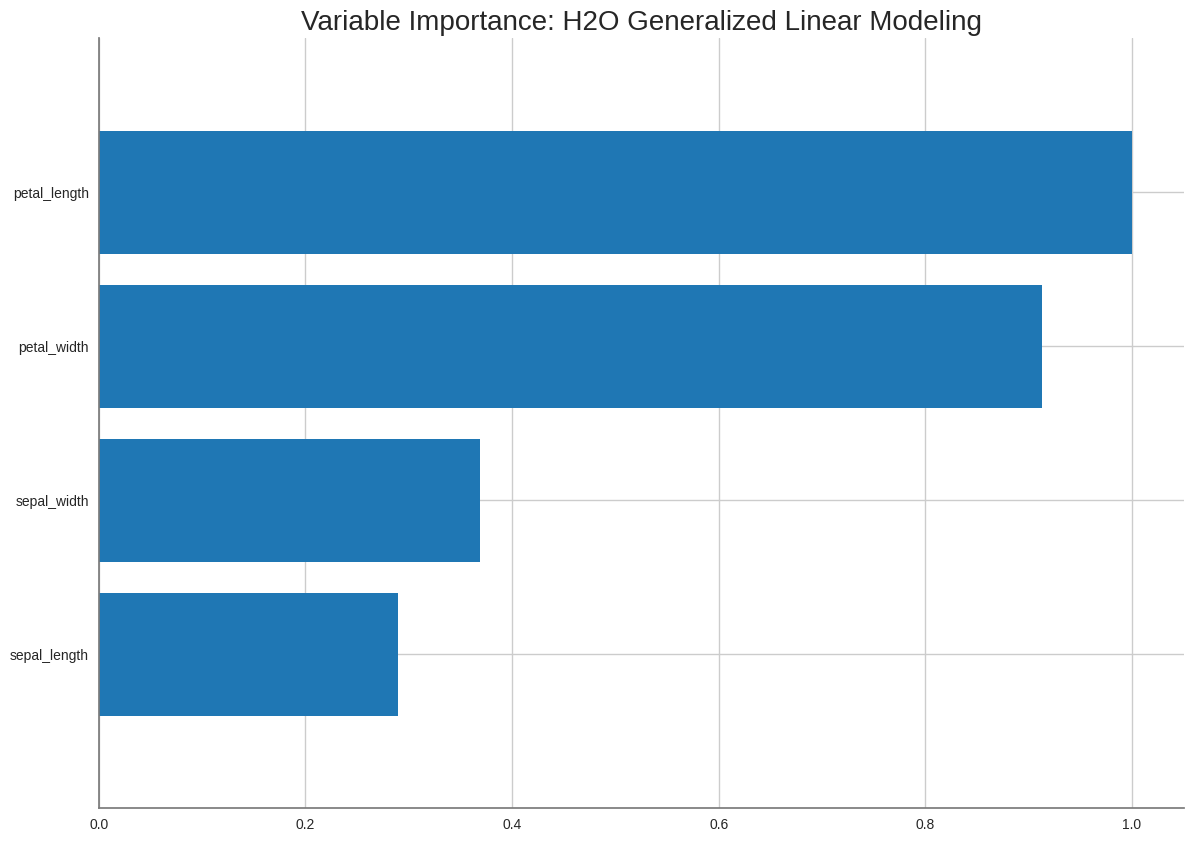

<Figure size 800x550 with 0 Axes>

In [81]:
# Visualizar la importancia de características
aml.leader.varimp_plot()


In [82]:
# Realizar predicciones sobre el conjunto de prueba
predicciones = aml.leader.predict(test)

# Mostrar las primeras 10 predicciones
print(predicciones.head(10))


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
predict          setosa    versicolor    virginica
versicolor  0.00019651    0.992882     0.00692111
setosa      0.996304      0.003696     1.18352e-16
virginica   8.17713e-17   5.09295e-07  0.999999
versicolor  0.000223421   0.965506     0.0342704
versicolor  5.91724e-06   0.96894      0.0310537
setosa      0.989877      0.0101225    2.74823e-15
versicolor  0.00751056    0.992349     0.000140051
virginica   3.71622e-09   0.0062634    0.993737
versicolor  1.76015e-06   0.629815     0.370184
versicolor  0.00114425    0.998454     0.000401519
[10 rows x 4 columns]



# Regresion

##4 lazypredict

In [18]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar los modelos
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Mostrar resultados mostradas por R2
models


100%|██████████| 42/42 [00:03<00:00, 12.21it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.02
AdaBoostRegressor,1.00,1.00,0.03,0.03
RandomForestRegressor,1.00,1.00,0.05,0.24
BaggingRegressor,0.99,1.00,0.06,0.06
ExtraTreesRegressor,0.99,0.99,0.07,0.15
GradientBoostingRegressor,0.99,0.99,0.07,0.10
XGBRegressor,0.99,0.99,0.07,1.46
KNeighborsRegressor,0.98,0.98,0.10,0.01
HistGradientBoostingRegressor,0.97,0.97,0.13,0.08


In [17]:
# Extraer el mejor modelo basado en el R²
best_model = models.iloc[0]  # El primer modelo es el mejor porque la tabla está ordenada por R²

# Mostrar el mejor modelo y sus métricas
print("\n🔹 **Mejor modelo:**", models.index[0])
print(best_model)


🔹 **Mejor modelo:** DecisionTreeRegressor
Adjusted R-Squared   1.00
R-Squared            1.00
RMSE                 0.00
Time Taken           0.02
Name: DecisionTreeRegressor, dtype: float64


## 5 flaml

In [32]:
from flaml import AutoML
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar AutoML
automl = AutoML()

# Configurar y entrenar FLAML
automl.fit(
    X_train, y_train,
    task="regression",   # Tipo de problema
    time_budget=300,     # Tiempo límite en segundos (ajustar según tu caso)
    metric="r2",         # Métrica para evaluar (puedes cambiar a 'rmse', 'mae', etc.)
    verbose=1            # Mostrar logs de entrenamiento
)

# Ver el mejor modelo encontrado
print("Mejor modelo encontrado:", automl.best_estimator)

# Hacer predicciones con el modelo optimizado
y_pred = automl.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Mejor modelo encontrado: lgbm
R² Score: 0.8451950905309566
RMSE: 0.45039731709236913


In [43]:
print("Mejor modelo encontrado:", automl.best_estimator)


Mejor modelo encontrado: lgbm


In [44]:
print("Mejores parámetros del modelo:", automl.best_config)


Mejores parámetros del modelo: {'n_estimators': 111, 'num_leaves': 186, 'min_child_samples': 2, 'learning_rate': 0.07154128424526202, 'log_max_bin': 9, 'colsample_bytree': 0.591579264701285, 'reg_alpha': 0.01435520144866301, 'reg_lambda': 0.006874802748054271}


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = automl.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar métricas
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.8452
RMSE: 0.4504
MAE: 0.2957


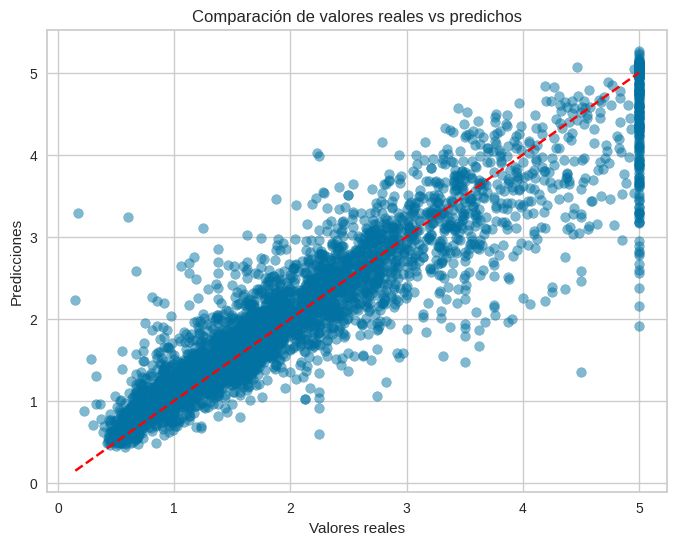

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación de valores reales vs predichos")
plt.show()


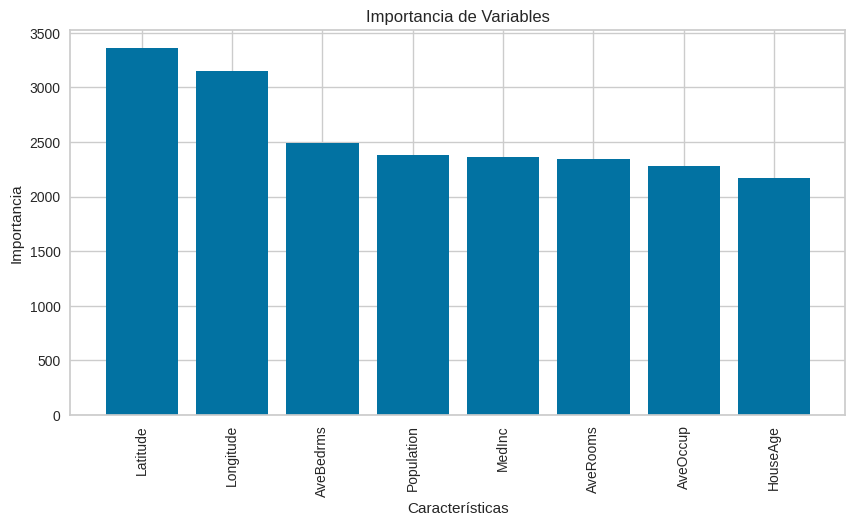

In [47]:
import numpy as np

# Obtener importancia de variables si está disponible
if hasattr(automl.model, "feature_importances_"):
    importances = automl.model.feature_importances_
    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

    sorted_indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.bar(range(len(importances)), importances[sorted_indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
    plt.xlabel("Características")
    plt.ylabel("Importancia")
    plt.title("Importancia de Variables")
    plt.show()


## 5 h2o

In [27]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica


In [30]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar H2O
h2o.init()

# Cargar los datos en formato H2O
df_h2o = h2o.H2OFrame(data)

# Dividir en entrenamiento y prueba
train, test = df_h2o.split_frame(ratios=[0.8])

# Definir el objetivo y las variables predictoras
target = 'species'
features = df_h2o.columns.remove(target)

# Configurar AutoML para regresión
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=features, y=target, training_frame=train)

# Mostrar el mejor modelo encontrado
print(aml.leader)



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj1iaf308
  JVM stdout: /tmp/tmpj1iaf308/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj1iaf308/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_o14emi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |████
06:27:55.969: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 111.0.

███████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20250309_62727


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 132                         52098                  1            6            5.91667       2             38            26.7652

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE:

In [33]:
lb = aml.leaderboard
print(lb)

model_id                                                  mean_per_class_error    logloss      rmse        mse
GBM_5_AutoML_1_20250309_62727                                        0.043659   0.136903   0.199201  0.0396812
DRF_1_AutoML_1_20250309_62727                                        0.044121   0.110033   0.188458  0.0355164
GLM_1_AutoML_1_20250309_62727                                        0.044583   0.0858843  0.16781   0.0281602
GBM_2_AutoML_1_20250309_62727                                        0.0526681  0.132447   0.19842   0.0393706
GBM_4_AutoML_1_20250309_62727                                        0.0526681  0.12251    0.189083  0.0357523
GBM_3_AutoML_1_20250309_62727                                        0.0526681  0.122595   0.191237  0.0365716
XRT_1_AutoML_1_20250309_62727                                        0.0526681  0.109076   0.187693  0.0352285
StackedEnsemble_BestOfFamily_1_AutoML_1_20250309_62727               0.0616771  0.121569   0.196242  0.0385108
X

In [34]:
best_model = aml.leader
best_model


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20250309_62727


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 132                         52098                  1            6            5.91667       2             38            26.7652

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 2.2890642089460014e-05
RMSE: 0.004784416588201744
LogLoss: 0.0034178691994482275
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error    Rate
--------  ------------  -----------  -------  -------
35        0             0            0        0 / 35
0         37            0            0        0 / 37
0         0             39           0        0 / 39
35        37            39           0        0 / 111

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.039681233166667204
RMSE: 0.19920148886659256
LogLoss: 0.13690326222964033
Mean Per-Class Error: 0.04365904365904366
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
setosa    versicolor    virginica    Error      Rate
--------  ------------  -----------  ---------  -------
35        0             0            0          0 / 35
0         35            2            0.0540541  2 / 37
0         3             36           0.0769231  3 / 39
35        38            38           0.045045   5 / 111

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.954955
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.94585    0.0205667   0.956522      0.909091      0.954545      0.954545      0.954545
aic                      nan        0           nan           nan           nan           nan           nan
auc                      nan        0           nan           nan           nan           nan           nan
err                      0.0541502  0.0205667   0.0434783     0.0909091     0.0454545     0.0454545     0.0454545
err_count                1.2        0.447214    1             2             1             1             1
loglikelihood            nan        0           nan           nan           nan           nan           nan
logloss                  0.154403   0.111186    0.12733       0.323764      0.043708      0.198944      0.0782708
max_per_class_error      0.135714   0.00978076  0.125         0.142857      0.142857      0.142857      0.125
mean_per_class_accuracy  0.946429   0.0201855   0.958333      0.910714      0.952381      0.952381      0.958333
mean_per_class_error     0.0535714  0.0201855   0.0416667     0.0892857     0.0476191     0.0476191     0.0416667
mse                      0.0411661 

In [35]:
# Hacer predicciones en el conjunto de prueba
predictions = best_model.predict(test)

# Mostrar algunas predicciones
print(predictions.head())

# Evaluar el modelo
performance = best_model.model_performance(test)
print(performance)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
predict      setosa    versicolor    virginica
setosa     0.997753    0.00112366   0.00112362
setosa     0.997753    0.00112366   0.00112362
setosa     0.997756    0.0011222    0.00112219
setosa     0.997756    0.00112224   0.00112219
setosa     0.997753    0.00112366   0.00112362
setosa     0.997753    0.00112366   0.00112362
setosa     0.997753    0.00112366   0.00112362
setosa     0.997753    0.00112366   0.00112362
setosa     0.997774    0.00110908   0.0011165
setosa     0.997753    0.00112366   0.00112362
[10 rows x 4 columns]

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.05794062448567389
RMSE: 0.24070858830892156
LogLoss: 0.269653678070093
Mean Per-Class Error: 0.08624708624708625
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not co

In [41]:
print("RMSE:", performance.rmse())
print("R² Score:", performance.r2())


RMSE: 0.24070858830892156
R² Score: 0.9116957015604108


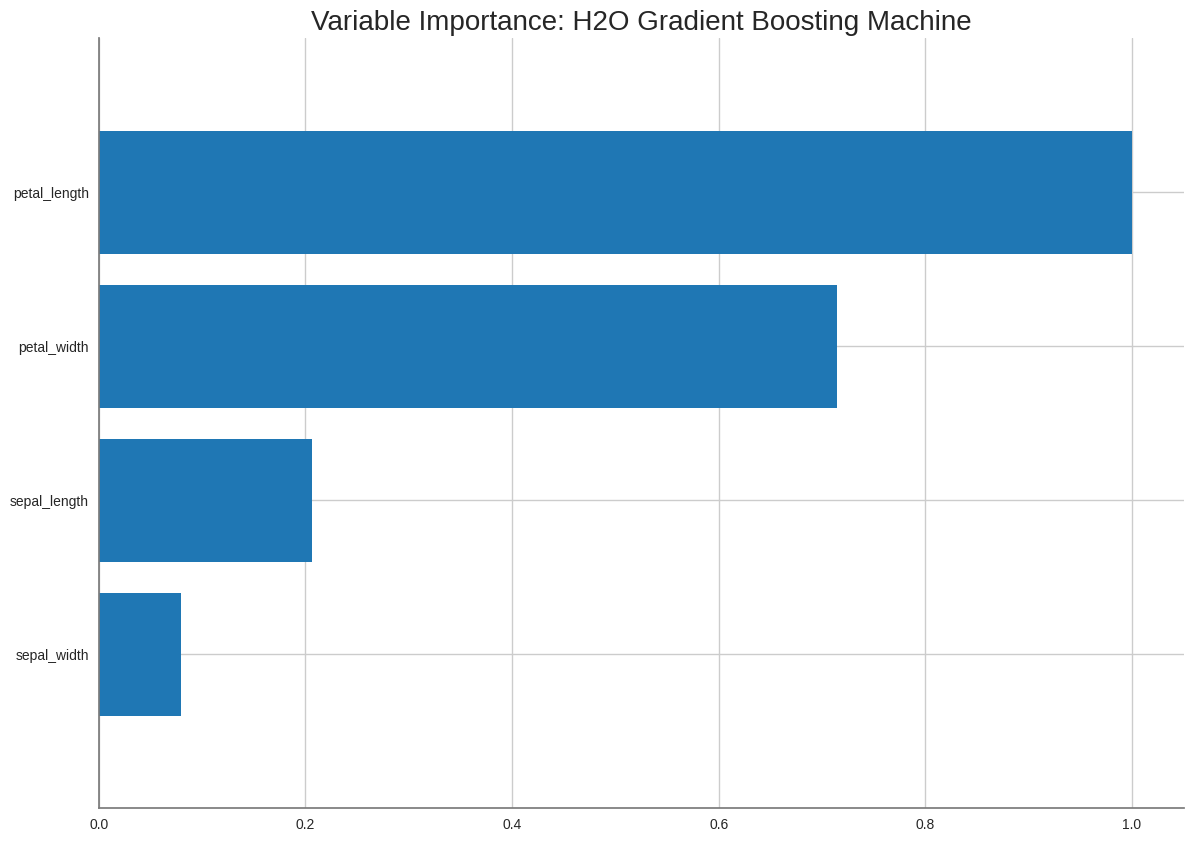

<Figure size 800x550 with 0 Axes>

In [42]:
best_model.varimp_plot()

# Agrupación

## h2o

In [107]:
!pip install -f https://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: https://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [108]:
import h2o
from h2o.estimators.kmeans import H2OKMeansEstimator

h2o.init()

# Cargar datos
data = h2o.import_file("iris.csv")

# Definir cuántos grupos (clusters) queremos
kmeans = H2OKMeansEstimator(k=3)

# Entrenar el modelo
kmeans.train(x=data.columns, training_frame=data)

# Ver los clusters asignados
predicciones = kmeans.predict(data)
print(predicciones)


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,30 mins 52 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_o14emi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.152 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
  predict
        2
        2
        2
        2
        2
        2
        2
        2
        2
        2
[150 rows x 1 column]



In [110]:
from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator as H2OPCA

# Inicializar modelo PCA
pca = H2OPCA(k=2)  # Reducimos a 2 dimensiones

# Entrenar el modelo
pca.train(x=data.columns, training_frame=data)

# Ver los resultados
print(pca)


pca Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OPrincipalComponentAnalysisEstimator : Principal Components Analysis
Model Key: PCA_model_python_1741501624674_29


Importance of components: 
                        pc1       pc2
----------------------  --------  ---------
Standard deviation      7.87781   1.47713
Proportion of Variance  0.959603  0.0337379
Cumulative Proportion   0.959603  0.993341

ModelMetricsPCA: pca
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): None
Misclassification Error (Categorical): None

Scoring History for GramSVD: 
    timestamp            duration    iterations
--  -------------------  ----------  ------------
    2025-03-09 06:58:53  0.555 sec   0


In [132]:
from h2o.estimators.kmeans import H2OKMeansEstimator

# Aplicar PCA a los datos
transformed = pca.predict(data)

# Definir el modelo K-Means (por ejemplo, con 3 clusters)
kmeans = H2OKMeansEstimator(k=3)

# Entrenar K-Means usando las componentes principales
kmeans.train(x=transformed.columns, training_frame=transformed)

# Ver los resultados del clustering
print(kmeans)


pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
Model Details
H2OKMeansEstimator : K-means
Model Key: KMeans_model_python_1741501624674_30


Model Summary: 
    number_of_rows    number_of_clusters    number_of_categorical_columns    number_of_iterations    within_cluster_sum_of_squares    total_sum_of_squares    between_cluster_sum_of_squares
--  ----------------  --------------------  -------------------------------  ----------------------  -------------------------------  ----------------------  --------------------------------
    150               3                     0                                5                       28.0983                          298                     269.902

ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 28.098312197193106
Total Sum of Square Error to Gr

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,11 mins 56 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_et3oap
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.168 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |█████████████████████

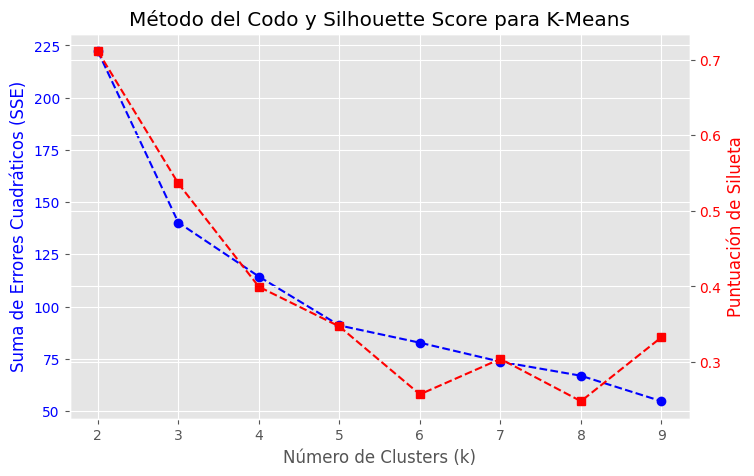

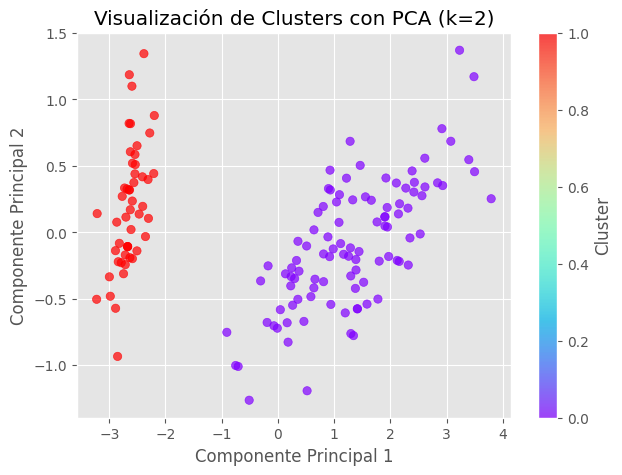

In [18]:
# @title Agrupación
import matplotlib.pyplot as plt
import h2o
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np

# Inicializar H2O
h2o.init()

# Cargar los datos (asegúrate de tener 'iris.csv' o tu dataset adecuado)
data = h2o.import_file("iris.csv")
data = data.drop(["species"], axis=1)  # Ajusta según las columnas de tu dataset

# Convertir a Pandas para aplicar PCA con sklearn
data_pd = h2o.as_list(data)

# Aplicar PCA y reducir a 2 dimensiones
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_pd)

# Definir valores de K a probar
k_values = range(2, 10)
sse_values = []
silhouette_values = []
cluster_results = {}

for k in k_values:
    # Definir y entrenar K-Means
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=data.columns, training_frame=data)

    # Obtener SSE
    sse_values.append(kmeans.tot_withinss())

    # Obtener etiquetas de clusters y calcular la silueta
    cluster_assignments = kmeans.predict(data)
    labels = h2o.as_list(cluster_assignments).values.flatten()

    silhouette_avg = silhouette_score(data_pca, labels)  # Calcular silueta
    silhouette_values.append(silhouette_avg)

    # Guardar resultados para visualización
    cluster_results[k] = labels

# Graficar Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(8, 5))

# Graficar SSE (método del codo)
ax1.plot(k_values, sse_values, marker='o', linestyle='--', color='b', label='SSE')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Suma de Errores Cuadráticos (SSE)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Agregar un segundo eje para la Silhouette Score
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_values, marker='s', linestyle='--', color='r', label='Silhouette Score')
ax2.set_ylabel('Puntuación de Silueta', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Método del Codo y Silhouette Score para K-Means')
plt.show()

# 🔹 Visualización de los Clusters en 2D (PCA)
best_k = max(cluster_results, key=lambda k: silhouette_values[k_values.index(k)])  # k con mejor silhouette
best_labels = cluster_results[best_k]

plt.figure(figsize=(7, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=best_labels, cmap='rainbow', alpha=0.7)
plt.title(f'Visualización de Clusters con PCA (k={best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


## Scikit-Optimize (skopt)

In [137]:
%pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.4.2 which is incompatible.


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,12 mins 43 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_et3oap
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.168 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |█████████████████████

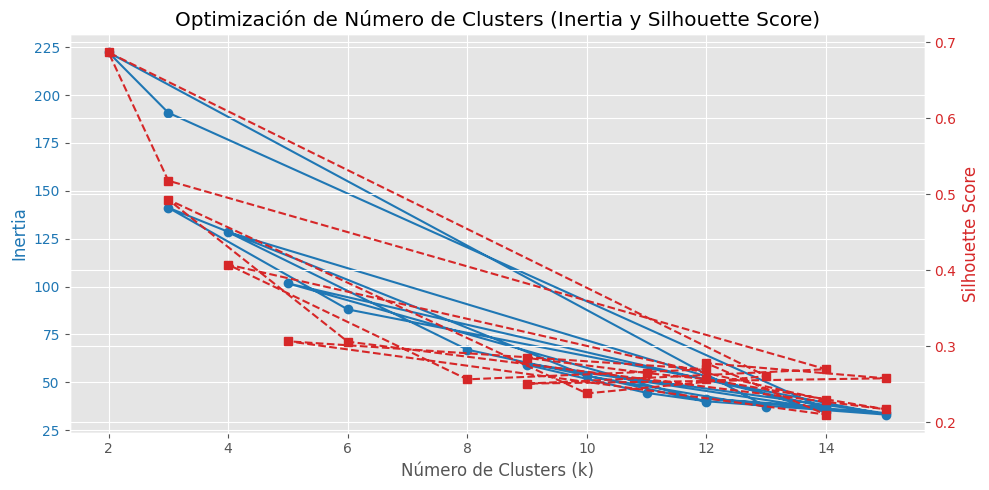

🔹 Mejor número de clusters con skopt: 2


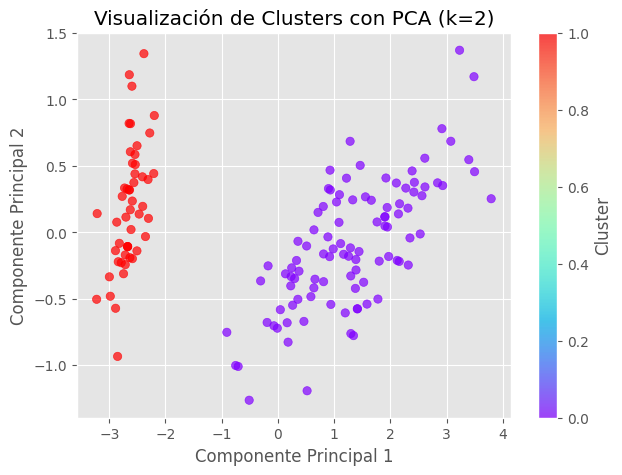

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from skopt import gp_minimize
from skopt.space import Integer
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import h2o

# Iniciar H2O
h2o.init()

# Cargar y transformar los datos
transformed = h2o.import_file("iris.csv")  # Ajusta el dataset según sea necesario
transformed = transformed.drop(["species"], axis=1)  # Eliminar variable categórica
transformed_scaled = h2o.as_list(transformed).values  # Convertir a NumPy

# Aplicar PCA para visualizar en 2D
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(transformed_scaled)

# Definir el espacio de búsqueda para k
space = [Integer(2, 15, name="k")]

# Almacenar resultados
k_values = []
silhouette_scores = []
inertia_values = []
cluster_assignments = {}

# Función de evaluación para skopt
def evaluate_kmeans(k_list):
    k = int(k_list[0])  # skopt pasa valores en listas
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=transformed.names, training_frame=transformed)

    # Predicciones y etiquetas
    labels = h2o.as_list(kmeans.predict(transformed)).values.flatten()
    silhouette_avg = silhouette_score(transformed_scaled, labels)
    inertia = kmeans.tot_withinss()  # Obtener inertia del modelo KMeans de H2O

    # Almacenar valores
    k_values.append(k)
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(inertia)
    cluster_assignments[k] = labels  # Guardar etiquetas de clusters

    return -silhouette_avg  # skopt minimiza, así que invertimos la métrica

# Ejecutar optimización bayesiana
res = gp_minimize(evaluate_kmeans, space, n_calls=20)

# Graficar la relación entre k, Inertia y Silhouette Score
fig, ax1 = plt.subplots(figsize=(10, 5))

# Graficar Inertia
ax1.set_xlabel("Número de Clusters (k)")
ax1.set_ylabel("Inertia", color="tab:blue")
ax1.plot(k_values, inertia_values, marker="o", linestyle="-", color="tab:blue", label="Inertia")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Crear segundo eje para Silhouette Score
ax2 = ax1.twinx()
ax2.set_ylabel("Silhouette Score", color="tab:red")
ax2.plot(k_values, silhouette_scores, marker="s", linestyle="--", color="tab:red", label="Silhouette Score")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Títulos y leyenda
plt.title("Optimización de Número de Clusters (Inertia y Silhouette Score)")
fig.tight_layout()
plt.show()

# 🔹 Mejor número de clusters obtenido con skopt
best_k = res.x[0]
best_labels = cluster_assignments[best_k]

print(f"🔹 Mejor número de clusters con skopt: {best_k}")

# Visualización de los clusters en 2D con PCA
plt.figure(figsize=(7, 5))
plt.scatter(transformed_pca[:, 0], transformed_pca[:, 1], c=best_labels, cmap='rainbow', alpha=0.7)
plt.title(f'Visualización de Clusters con PCA (k={best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


## hyperopt

In [13]:
%pip install hyperopt

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,14 mins 38 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_et3oap
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |
███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |
███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |
███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |
███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |█████████████████

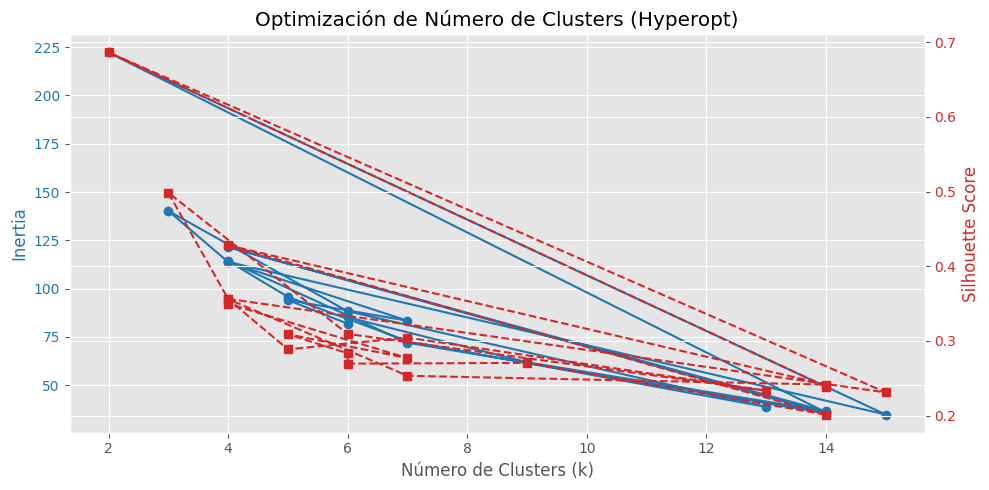

In [20]:
import h2o
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.metrics import silhouette_score
from hyperopt import fmin, tpe, hp, Trials

# Iniciar H2O
h2o.init()

# Cargar datos y transformar
transformed = h2o.import_file("iris.csv")  # Asegúrate de tener el archivo
transformed = transformed.drop(["species"], axis=1)  # Quitar variable categórica
transformed_scaled = h2o.as_list(transformed).values  # Convertir a NumPy

# Definir el espacio de búsqueda para k
space = hp.quniform("k", 2, 15, 1)  # Busca valores enteros entre 2 y 15

# Almacenar resultados
k_values = []
silhouette_scores = []
inertia_values = []

# Función de evaluación
def evaluate_kmeans(params):
    k = int(params["k"])  # Convertir a entero
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=transformed.names, training_frame=transformed)

    # Predicciones y métricas
    labels = h2o.as_list(kmeans.predict(transformed)).values.flatten()
    silhouette_avg = silhouette_score(transformed_scaled, labels)
    inertia = kmeans.tot_withinss()

    # Almacenar métricas
    k_values.append(k)
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(inertia)

    return -silhouette_avg  # Queremos maximizar Silhouette, pero Hyperopt minimiza

# Ejecutar optimización con TPE
trials = Trials()
best = fmin(
    fn=evaluate_kmeans,  # Función de evaluación
    space={"k": space},  # Espacio de búsqueda
    algo=tpe.suggest,  # Algoritmo de optimización
    max_evals=20,  # Número de iteraciones
    trials=trials  # Almacena los resultados
)

best_k = int(best["k"])
print(f"🔹 Mejor número de clusters con Hyperopt: {best_k}")

# Graficar resultados
fig, ax1 = plt.subplots(figsize=(10, 5))

# Graficar Inertia
ax1.set_xlabel("Número de Clusters (k)")
ax1.set_ylabel("Inertia", color="tab:blue")
ax1.plot(k_values, inertia_values, marker="o", linestyle="-", color="tab:blue", label="Inertia")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Segundo eje para Silhouette Score
ax2 = ax1.twinx()
ax2.set_ylabel("Silhouette Score", color="tab:red")
ax2.plot(k_values, silhouette_scores, marker="s", linestyle="--", color="tab:red", label="Silhouette Score")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Título y leyenda
plt.title("Optimización de Número de Clusters (Hyperopt)")
fig.tight_layout()
plt.show()


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


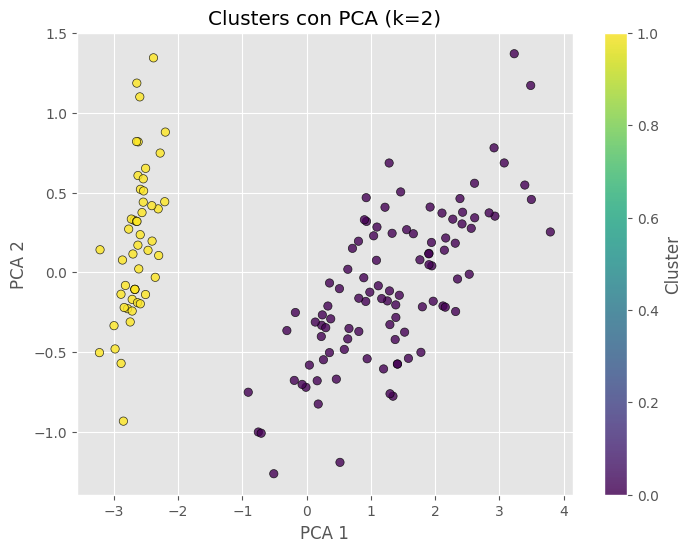

In [21]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2D
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(transformed_scaled)

# Obtener etiquetas del modelo entrenado con el mejor k
best_kmeans = H2OKMeansEstimator(k=best_k)
best_kmeans.train(x=transformed.names, training_frame=transformed)
labels = h2o.as_list(best_kmeans.predict(transformed)).values.flatten()

# Graficar los clusters en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(transformed_pca[:, 0], transformed_pca[:, 1], c=labels, cmap="viridis", edgecolor="k", alpha=0.8)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Clusters con PCA (k={best_k})")
plt.show()


## AutoML

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,15 mins 28 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_et3oap
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |█████████████████████

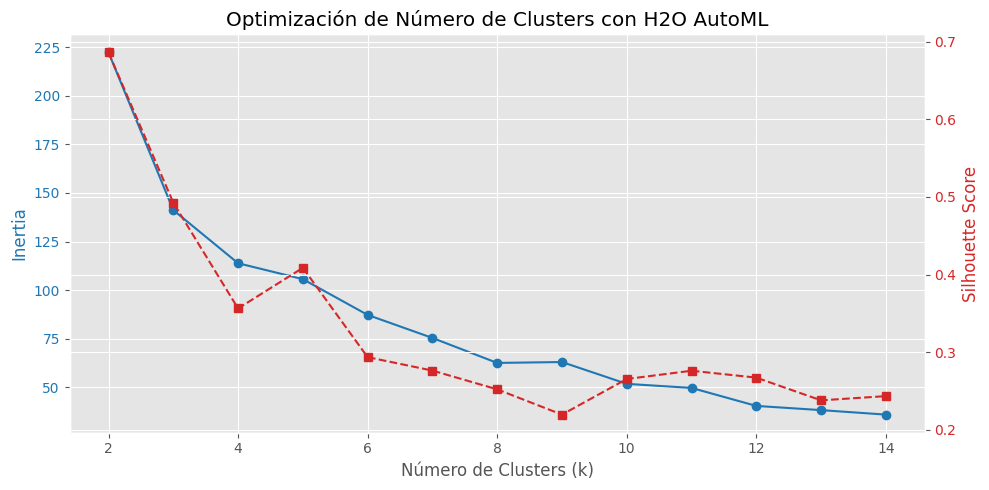

In [22]:
import h2o
import numpy as np
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.metrics import silhouette_score

# Iniciar H2O
h2o.init()

# Cargar datos y preparar
transformed = h2o.import_file("iris.csv")  # Asegúrate de tener el archivo
transformed = transformed.drop(["species"], axis=1)  # Eliminar columna categórica
transformed_scaled = h2o.as_list(transformed).values  # Convertir a NumPy

# Definir rangos de k y métricas
k_values = list(range(2, 15))  # Probar desde 2 hasta 14 clusters
silhouette_scores = []
inertia_values = []

# Probar varios modelos de K-Means con AutoML
best_silhouette = -1
best_k = None

for k in k_values:
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=transformed.names, training_frame=transformed)

    # Predicciones y métricas
    labels = h2o.as_list(kmeans.predict(transformed)).values.flatten()
    silhouette_avg = silhouette_score(transformed_scaled, labels)
    inertia = kmeans.tot_withinss()

    silhouette_scores.append(silhouette_avg)
    inertia_values.append(inertia)

    # Guardar el mejor k
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

print(f"🔹 Mejor número de clusters con AutoML: {best_k}")

# Graficar resultados
fig, ax1 = plt.subplots(figsize=(10, 5))

# Graficar Inertia
ax1.set_xlabel("Número de Clusters (k)")
ax1.set_ylabel("Inertia", color="tab:blue")
ax1.plot(k_values, inertia_values, marker="o", linestyle="-", color="tab:blue", label="Inertia")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Segundo eje para Silhouette Score
ax2 = ax1.twinx()
ax2.set_ylabel("Silhouette Score", color="tab:red")
ax2.plot(k_values, silhouette_scores, marker="s", linestyle="--", color="tab:red", label="Silhouette Score")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Título y leyenda
plt.title("Optimización de Número de Clusters con H2O AutoML")
fig.tight_layout()
plt.show()


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


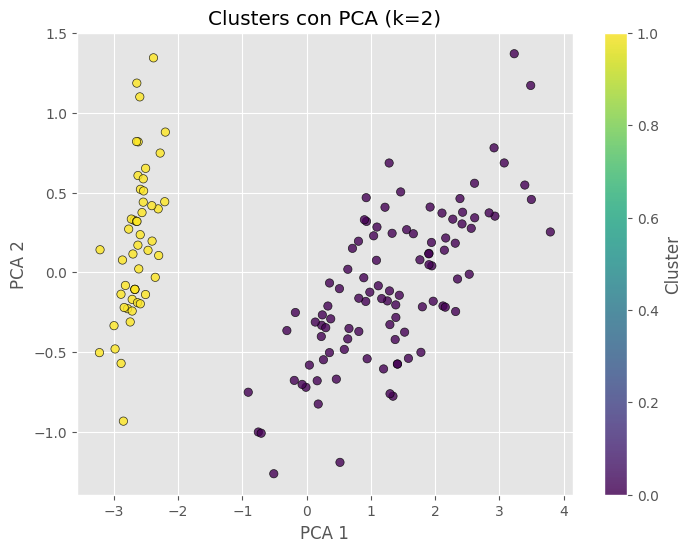

In [23]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2D
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(transformed_scaled)

# Entrenar K-Means con el mejor k encontrado
best_kmeans = H2OKMeansEstimator(k=best_k)
best_kmeans.train(x=transformed.names, training_frame=transformed)

# Obtener etiquetas de los clusters
labels = h2o.as_list(best_kmeans.predict(transformed)).values.flatten()

# Graficar los clusters con PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(transformed_pca[:, 0], transformed_pca[:, 1], c=labels, cmap="viridis", edgecolor="k", alpha=0.8)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Clusters con PCA (k={best_k})")
plt.show()


## optuna

In [16]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.6 MB/s eta 0:00:00


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,10 mins 22 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_et3oap
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.168 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


[I 2025-03-09 07:30:05,362] A new study created in memory with name: no-name-098c9866-1970-4e2a-b9e3-1ad02d65b37b
[I 2025-03-09 07:30:05,501] Trial 0 finished with value: 0.6863930543445408 and parameters: {'k': 2}. Best is trial 0 with value: 0.6863930543445408.
[I 2025-03-09 07:30:05,590] Trial 1 finished with value: 0.2407999981355249 and parameters: {'k': 15}. Best is trial 0 with value: 0.6863930543445408.


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%


[I 2025-03-09 07:30:05,671] Trial 2 finished with value: 0.49733896469631284 and parameters: {'k': 3}. Best is trial 0 with value: 0.6863930543445408.


kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:06,012] Trial 3 finished with value: 0.23186635737444997 and parameters: {'k': 14}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:06,319] Trial 4 finished with value: 0.26216813719468746 and parameters: {'k': 7}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:06,627] Trial 5 finished with value: 0.3096203743190487 and parameters: {'k': 5}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:06,987] Trial 6 finished with value: 0.23002846915980324 and parameters: {'k': 12}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:07,354] Trial 7 finished with value: 0.2886499529313423 and parameters: {'k': 5}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:07,653] Trial 8 finished with value: 0.24803040847445193 and parameters: {'k': 6}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:07,973] Trial 9 finished with value: 0.23571268299788467 and parameters: {'k': 15}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:08,326] Trial 10 finished with value: 0.6863930543445408 and parameters: {'k': 2}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


[I 2025-03-09 07:30:08,450] Trial 11 finished with value: 0.6863930543445408 and parameters: {'k': 2}. Best is trial 0 with value: 0.6863930543445408.


kmeans Model Build progress: |

[I 2025-03-09 07:30:08,849] Trial 12 finished with value: 0.24707992574431445 and parameters: {'k': 10}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


[I 2025-03-09 07:30:09,066] Trial 13 finished with value: 0.6863930543445408 and parameters: {'k': 2}. Best is trial 0 with value: 0.6863930543445408.


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%


[I 2025-03-09 07:30:09,278] Trial 14 finished with value: 0.35596426398092884 and parameters: {'k': 4}. Best is trial 0 with value: 0.6863930543445408.


kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:09,713] Trial 15 finished with value: 0.21811082294112338 and parameters: {'k': 8}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |

[I 2025-03-09 07:30:10,190] Trial 16 finished with value: 0.25373540610795675 and parameters: {'k': 10}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%


[I 2025-03-09 07:30:10,652] Trial 17 finished with value: 0.44804733385693113 and parameters: {'k': 4}. Best is trial 0 with value: 0.6863930543445408.


kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


[I 2025-03-09 07:30:10,814] Trial 18 finished with value: 0.6863930543445408 and parameters: {'k': 2}. Best is trial 0 with value: 0.6863930543445408.


kmeans Model Build progress: |

[I 2025-03-09 07:30:11,296] Trial 19 finished with value: 0.43533614881099386 and parameters: {'k': 4}. Best is trial 0 with value: 0.6863930543445408.


███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
🔹 Mejor número de clusters con Optuna: 2


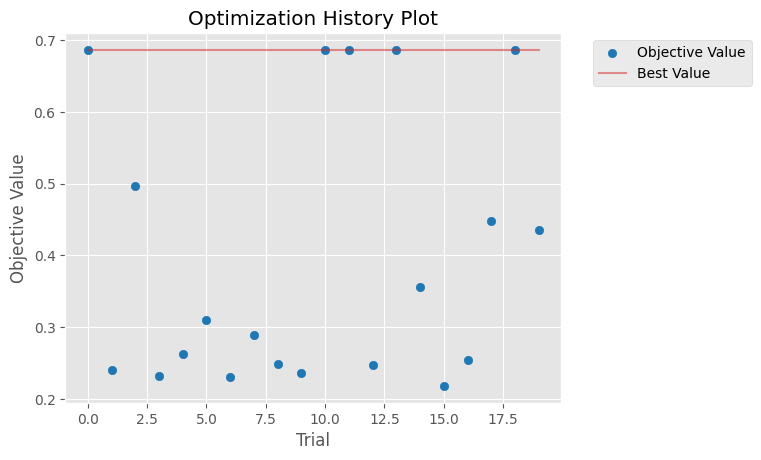

In [17]:
import h2o
import optuna
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.metrics import silhouette_score

# Iniciar H2O
h2o.init()

# Cargar y preparar datos
transformed = h2o.import_file("iris.csv")  # Asegúrate de que el archivo existe
transformed = transformed.drop(["species"], axis=1)  # Eliminar columna categórica
transformed_scaled = h2o.as_list(transformed).values  # Convertir a NumPy para evaluar Silhouette Score

# Función para optimizar con Optuna
def objective(trial):
    k = trial.suggest_int("k", 2, 15)  # Rango de búsqueda para K

    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=transformed.names, training_frame=transformed)

    # Predicciones y métricas
    labels = h2o.as_list(kmeans.predict(transformed)).values.flatten()
    silhouette_avg = silhouette_score(transformed_scaled, labels)

    return silhouette_avg  # Maximizar la métrica

# Ejecutar optimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # Ejecutar 20 pruebas

# Mejor resultado
best_k = study.best_params["k"]
print(f"🔹 Mejor número de clusters con Optuna: {best_k}")

# Graficar el proceso de optimización
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


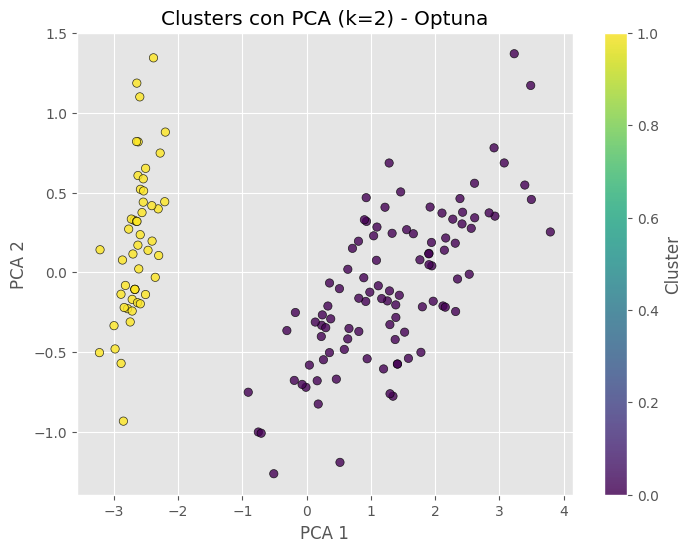

In [24]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir los datos a 2 dimensiones
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(transformed_scaled)

# Entrenar K-Means con el mejor K encontrado por Optuna
best_kmeans = H2OKMeansEstimator(k=best_k)
best_kmeans.train(x=transformed.names, training_frame=transformed)

# Obtener etiquetas de los clusters
labels = h2o.as_list(best_kmeans.predict(transformed)).values.flatten()

# Graficar los clusters con PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(transformed_pca[:, 0], transformed_pca[:, 1], c=labels, cmap="viridis", edgecolor="k", alpha=0.8)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Clusters con PCA (k={best_k}) - Optuna")
plt.show()


# RDT (Reusable Data Transformers) para Preprocesar Datos

## clasificación

In [25]:
%pip install rdt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.3 MB/s eta 0:00:00


In [29]:
import pandas as pd
import seaborn as sns
from rdt import HyperTransformer
from sklearn.model_selection import train_test_split

# 1️⃣ Cargar el dataset de Titanic 📥
df = sns.load_dataset("titanic")

# 2️⃣ Seleccionar algunas columnas para la prueba
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town']]

# 3️⃣ Eliminar filas con valores nulos
df = df.dropna()

# 4️⃣ Separar variable objetivo
target_column = "survived"
X = df.drop(columns=[target_column])
y = df[target_column]

# 5️⃣ Crear el transformador RDT 🚀
ht = HyperTransformer()

# 6️⃣ Detectar configuración automáticamente ✅
ht.detect_initial_config(X)

# 7️⃣ Ajustar y transformar los datos 🔄
ht.fit(X)
X_transformed = ht.transform(X)

# 8️⃣ Convertir a DataFrame para visualizar 🔍
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

# 9️⃣ Mostrar comparación antes y después de la transformación
print("🔹 Datos originales:")
print(X.head())

print("\n🔹 Datos transformados:")
print(X_transformed.head())

# 🔟 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


🔹 Datos originales:
   pclass     sex   age     fare  embark_town
0       3    male  22.0   7.2500  Southampton
1       1  female  38.0  71.2833    Cherbourg
2       3  female  26.0   7.9250  Southampton
3       1  female  35.0  53.1000  Southampton
4       3    male  35.0   8.0500  Southampton

🔹 Datos transformados:
   pclass       sex   age     fare  embark_town
0     3.0  0.331416  22.0   7.2500     0.679026
1     1.0  0.870954  38.0  71.2833     0.913283
2     3.0  0.739184  26.0   7.9250     0.106140
3     1.0  0.700191  35.0  53.1000     0.114580
4     3.0  0.490280  35.0   8.0500     0.090485


In [32]:
# clasificar con los datos transformados
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score

# 1️⃣1️⃣ Aplicar LazyPredict 🚀
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=accuracy_score)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# 1️⃣2️⃣ Mostrar resultados ordenados por precisión
print("🔹 Comparación de Modelos:")
models.sort_values(by="Accuracy", ascending=False)


100%|██████████| 29/29 [00:05<00:00,  5.68it/s]

[LightGBM] [Info] Number of positive: 225, number of negative: 344
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395431 -> initscore=-0.424541
[LightGBM] [Info] Start training from score -0.424541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,accuracy_score,Time Taken
Model,,,,,,
SVC,0.79,0.77,0.77,0.78,0.79,0.08
NuSVC,0.79,0.77,0.77,0.78,0.79,0.11
AdaBoostClassifier,0.78,0.77,0.77,0.78,0.78,0.22
LinearDiscriminantAnalysis,0.78,0.76,0.76,0.77,0.78,0.06
RandomForestClassifier,0.78,0.76,0.76,0.77,0.78,0.60
LGBMClassifier,0.77,0.76,0.76,0.77,0.77,0.10
RidgeClassifierCV,0.77,0.76,0.76,0.77,0.77,0.05
LogisticRegression,0.77,0.76,0.76,0.77,0.77,0.05
RidgeClassifier,0.77,0.76,0.76,0.77,0.77,0.05


## agrupación

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,47 mins 07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_et3oap
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |█████████████████████

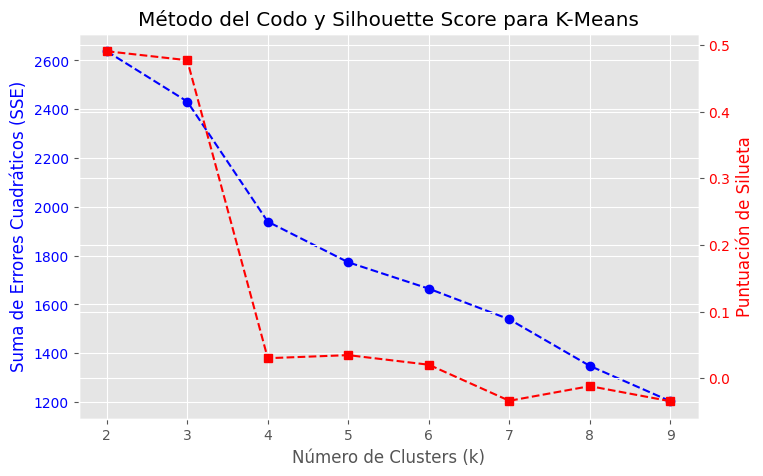

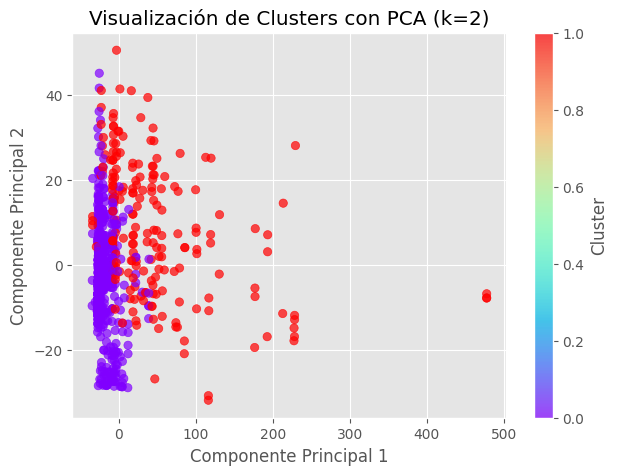

In [33]:
# @title agrupación con los datos transformados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h2o
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from rdt import HyperTransformer

# 🔹 Inicializar H2O
h2o.init()

# 1️⃣ Cargar el dataset de Titanic 📥
df = sns.load_dataset("titanic")

# 2️⃣ Seleccionar algunas columnas para la prueba
df = df[['pclass', 'sex', 'age', 'fare', 'embark_town']]
df = df.dropna()  # Eliminar nulos

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(df)
ht.fit(df)
df_transformed = ht.transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# 4️⃣ Convertir a H2OFrame 📄
df_h2o = h2o.H2OFrame(df_transformed)

# 5️⃣ Aplicar PCA y reducir a 2 dimensiones
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_transformed)

# 6️⃣ Definir valores de K a probar
k_values = range(2, 10)
sse_values = []
silhouette_values = []
cluster_results = {}

for k in k_values:
    # 🔹 Definir y entrenar K-Means en H2O
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=df_h2o.columns, training_frame=df_h2o)

    # 🔹 Obtener SSE
    sse_values.append(kmeans.tot_withinss())

    # 🔹 Obtener etiquetas de clusters y calcular la silueta
    cluster_assignments = kmeans.predict(df_h2o)
    labels = h2o.as_list(cluster_assignments).values.flatten()

    silhouette_avg = silhouette_score(df_pca, labels)  # Calcular silhouette
    silhouette_values.append(silhouette_avg)

    # Guardar resultados para visualización
    cluster_results[k] = labels

# 🔹 Graficar Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(k_values, sse_values, marker='o', linestyle='--', color='b', label='SSE')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Suma de Errores Cuadráticos (SSE)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_values, marker='s', linestyle='--', color='r', label='Silhouette Score')
ax2.set_ylabel('Puntuación de Silueta', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Método del Codo y Silhouette Score para K-Means')
plt.show()

# 🔹 Visualización de los Clusters en 2D (PCA)
best_k = max(cluster_results, key=lambda k: silhouette_values[k_values.index(k)])  # k con mejor silhouette
best_labels = cluster_results[best_k]

plt.figure(figsize=(7, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=best_labels, cmap='rainbow', alpha=0.7)
plt.title(f'Visualización de Clusters con PCA (k={best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()



Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,50 mins 45 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_et3oap
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.166 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |█████████████████████

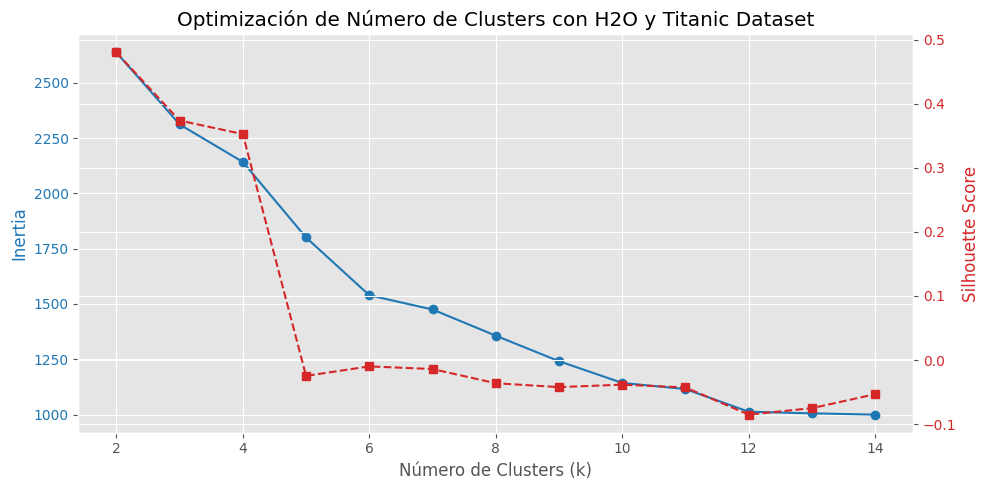

In [34]:
import h2o
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdt import HyperTransformer
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.metrics import silhouette_score

# 🔹 Inicializar H2O
h2o.init()

# 1️⃣ Cargar el dataset de Titanic 📥
df = sns.load_dataset("titanic")

# 2️⃣ Seleccionar algunas columnas para la prueba
df = df[['pclass', 'sex', 'age', 'fare', 'embark_town']]
df = df.dropna()  # Eliminar valores nulos

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(df)
ht.fit(df)
df_transformed = ht.transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# Convertir a H2O Frame
transformed_h2o = h2o.H2OFrame(df_transformed)

# Definir rangos de k y métricas
k_values = list(range(2, 15))  # Probar desde 2 hasta 14 clusters
silhouette_scores = []
inertia_values = []

# Probar varios modelos de K-Means con H2O
best_silhouette = -1
best_k = None

for k in k_values:
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=transformed_h2o.names, training_frame=transformed_h2o)

    # Predicciones y métricas
    labels = h2o.as_list(kmeans.predict(transformed_h2o)).values.flatten()
    silhouette_avg = silhouette_score(df_transformed, labels)
    inertia = kmeans.tot_withinss()

    silhouette_scores.append(silhouette_avg)
    inertia_values.append(inertia)

    # Guardar el mejor k
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

print(f"🔹 Mejor número de clusters: {best_k}")

# Graficar resultados
fig, ax1 = plt.subplots(figsize=(10, 5))

# Graficar Inertia
ax1.set_xlabel("Número de Clusters (k)")
ax1.set_ylabel("Inertia", color="tab:blue")
ax1.plot(k_values, inertia_values, marker="o", linestyle="-", color="tab:blue", label="Inertia")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Segundo eje para Silhouette Score
ax2 = ax1.twinx()
ax2.set_ylabel("Silhouette Score", color="tab:red")
ax2.plot(k_values, silhouette_scores, marker="s", linestyle="--", color="tab:red", label="Silhouette Score")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Título y leyenda
plt.title("Optimización de Número de Clusters con H2O y Titanic Dataset")
fig.tight_layout()
plt.show()